# Projeto 2 - Ciência dos dados

Integrantes: 
<ul>
    <li>Caio Garcia</li>
    <li>Gabriel Penna</li>
    <li>Lucas ulson</li>
    <li>Douglas</li>
</ul>

Objetivo do trabalho: Realizar modelos de predição para encontrar possíveis padrões e respostas para analise da nossa base de dados, a qual fala sobre o aumento no número de horas dos aparelhos eletrônicos em um período de pandemia. 

<h2> Bibliotecas a serem utilizadas </h2>

In [19]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from math import *

<h2>Lendo a base de dados </h2>

In [20]:
dados = pd.read_excel("Projeto_2_cdados.xlsx")
dados

,Idade,Gênero,Estado,Emprego,Horas,Vontade,Pandemia,Aumento,Retomada,Ajuda
0,18,Masculino,Solteiro,Estudante universitário,7 a 10 horas,Sim,"Sim, aumentei o numero de horas",4,Sim,Sim
1,18,Masculino,Solteiro,Estudante universitário,7 a 10 horas,Sim,"Sim, aumentei o numero de horas",1,Sim,Sim
2,19,Masculino,Solteiro,Estudante universitário,Mais de 10 horas,Não,"Sim, aumentei o numero de horas",2,Não,Sim
3,19,Feminino,Solteiro,Estudante universitário,7 a 10 horas,Sim,"Sim, aumentei o numero de horas",4,Parcialmente,Sim
4,48,Masculino,Casado,Empregador,7 a 10 horas,Não,"Sim, aumentei o numero de horas",6,Parcialmente,Sim
...,...,...,...,...,...,...,...,...,...,...
188,18,Feminino,Solteiro,Estudante universitário,7 a 10 horas,Sim,"Sim, aumentei o numero de horas",7,Sim,Sim
189,16,Feminino,Solteiro,Estudante de colegial,7 a 10 horas,Sim,"Sim, aumentei o numero de horas",4,Sim,Sim
190,17,Masculino,Solteiro,Estudante de colegial,De 1 a 3 horas,Não,"Sim, aumentei o numero de horas",1,Sim,Sim
191,22,Feminino,Solteiro,Empregado,4 a 6 horas,Sim,"Sim, diminui o número de horas",1,Parcialmente,Sim


<h2>Lendo a base de dados</h2>

<h3>Idade</h3>

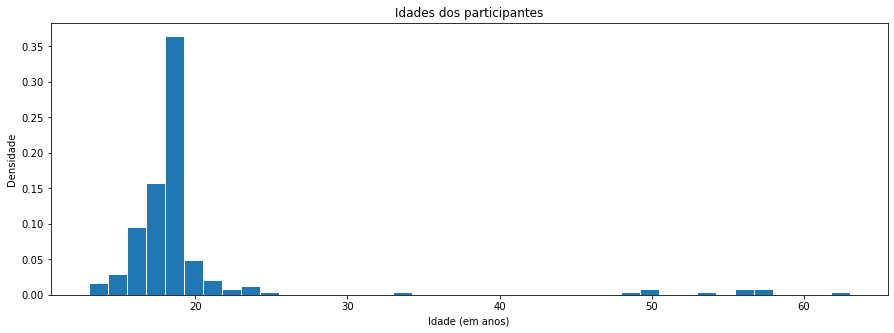

In [21]:
plt.figure(figsize=(15, 5))
plt.hist(dados['Idade'], bins=40, density=True,edgecolor='white',)
plt.ylabel('Densidade')
plt.xlabel('Idade (em anos)')
plt.title('Idades dos participantes')
plt.show()

In [22]:
dados.Idade.describe()

count    193.000000
mean      19.689119
std        8.030978
min       13.000000
25%       17.000000
50%       18.000000
75%       19.000000
max       63.000000
Name: Idade, dtype: float64

Pelos dados que obtivemos acima, podemos perceber que o nosso público tem como média de idade 19 anos, isso ocorre pois, a pesquisa foi realizada principalmente entre amigos e colegas dos participantes.

<h3>Sexo</h3>

In [23]:
dados.Gênero.value_counts(True)

Feminino     0.626943
Masculino    0.367876
Outro        0.005181
Name: Gênero, dtype: float64

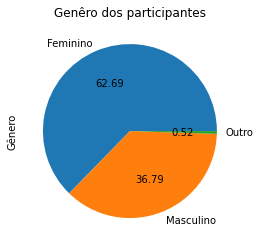

In [24]:
divisao_sexo = dados.Gênero.value_counts()
divisao_sexo.plot(kind='pie', title='Genêro dos participantes', autopct="%.2f")
plt.show()

<h2>Estado civil</h2>

In [25]:
dados.Estado.value_counts(True)

Solteiro    0.854922
Outro       0.124352
Casado      0.020725
Name: Estado, dtype: float64

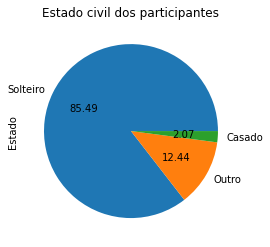

In [26]:
divisao_estado = dados.Estado.value_counts()
divisao_estado.plot(kind='pie', title='Estado civil dos participantes', autopct="%.2f")
plt.show()

<h2>Ocupação</h2>

In [27]:
dados.Emprego.value_counts(True)

Estudante universitário    0.481865
Estudante de colegial      0.430052
Empregado                  0.062176
Desempregado               0.015544
Empregador                 0.010363
Name: Emprego, dtype: float64

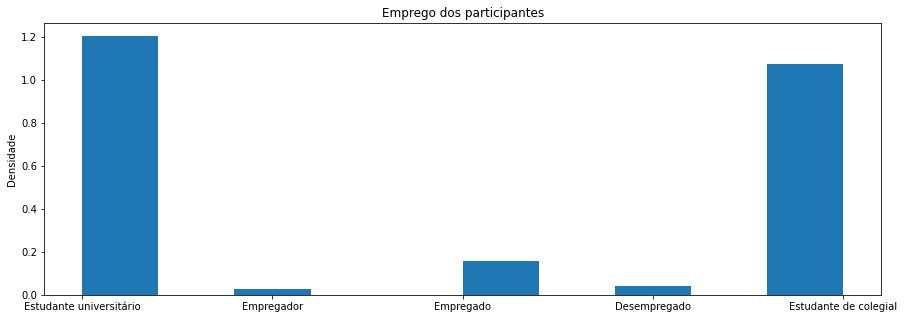

In [28]:
plt.figure(figsize=(15,5))
plt.hist(dados['Emprego'],density=True)
plt.ylabel("Densidade")
plt.title("Emprego dos participantes")
plt.show()

Ao fazer a análise dos gráficos abaixo, podemos notar uma grande concentração de pessoas entre 4 à 10 horas, sendo assim, podemos tirar a conclusão de que houve um aumento significativo do tempo que as pessoas passam na frente do computador, devemos continuar nosso raciocínio para acharmos um padrão ou formalidade.

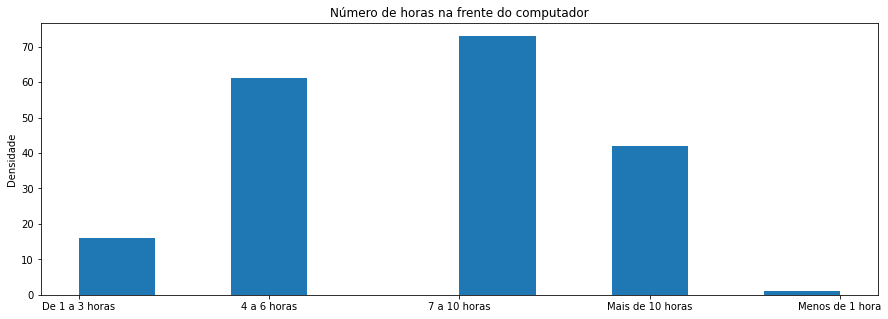

In [29]:
plt.figure(figsize=(15,5))
plt.hist(dados['Horas'][::-1])
plt.ylabel("Densidade")
plt.title("Número de horas na frente do computador")
plt.show()

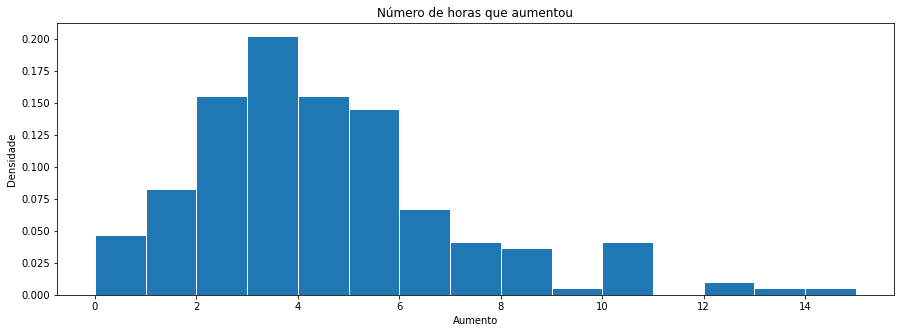

In [30]:
plt.figure(figsize=(15, 5))
plt.hist(dados['Aumento'], bins=15, density=True,edgecolor='white',)
plt.ylabel('Densidade')
plt.xlabel('Aumento')
plt.title('Número de horas que aumentou')
plt.show()

In [31]:
dados.Aumento.describe()

count    193.000000
mean       4.062176
std        2.654844
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       15.000000
Name: Aumento, dtype: float64

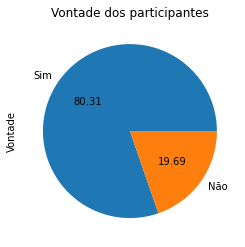

In [32]:
divisao_vontade = dados.Vontade.value_counts()
divisao_vontade.plot(kind='pie', title='Vontade dos participantes', autopct="%.2f")
plt.show()

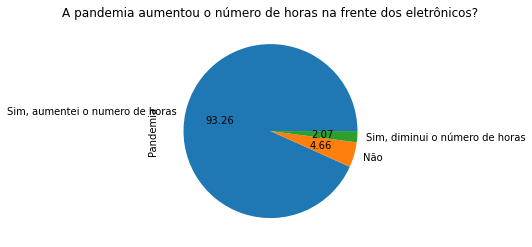

In [33]:
divisao_pandemia = dados.Pandemia.value_counts()
divisao_pandemia.plot(kind='pie', title='A pandemia aumentou o número de horas na frente dos eletrônicos?', autopct="%.2f")
plt.show()

In [34]:
uni = dados.loc[dados.Emprego == "Estudante universitário"]
col = dados.loc[dados.Emprego == "Estudante de colegial"]
emp = dados.loc[dados.Emprego == "Empregado"]
des = dados.loc[dados.Emprego == "Desempregado"]

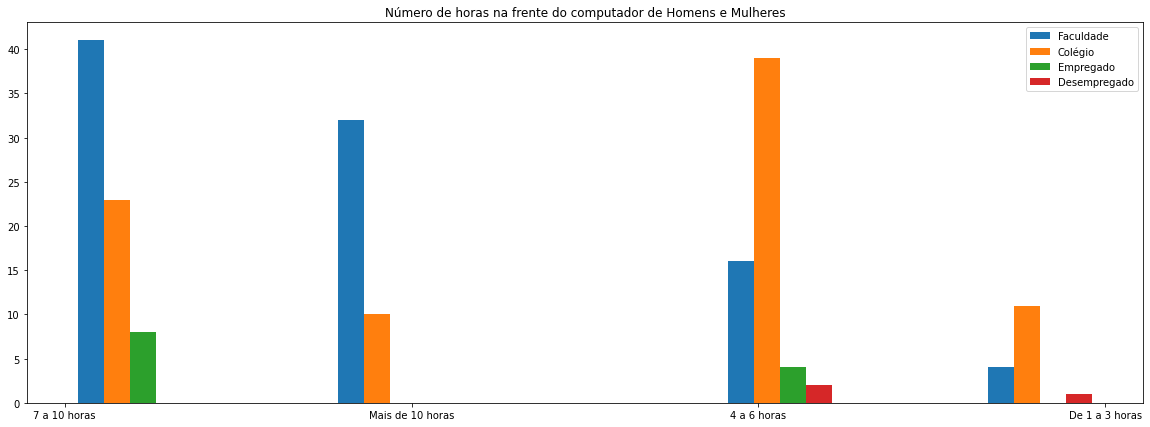

In [56]:
plt.figure(figsize=(20,7))
bins = 8
plt.hist([uni['Horas'][::-1], col['Horas'][::-1], emp['Horas'][::-1], des['Horas'][::-1]], bins, label=['Faculdade', 'Colégio', 'Empregado', 'Desempregado'])
plt.legend(loc='upper right')
plt.title("Número de horas na frente do computador de Homens e Mulheres")
plt.show()